### Clase 5, Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. 3 de Mayo 2024.

## Pandas

En esta clase vamos a trabajar con Pandas, que es una biblioteca opensource para manipulación y análisis de datos basada en Numpy, ofrece estructuras y operaciones para manejo de tablas numéricas.</br>
Un DataFrame es una estructura de datos relacional, es decir, se asemeja a una planilla de cálculo con columnas y filas indexadas.</br>
Para trabajar con mucha información, a veces termina siendo conveniente trabajar con una tabla en lugar de varios arreglos como hicimos hasta el momento, ya sea para presentarla prolijamente o exportarla a un archivo de texto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Para nuestro ejemplo, supongamos que la posición de una partícula responde a la siguiente ecuación horaria:</br>

$x(t)= cos(at) + bt^5 +ct^4$</br>

donde</br>
$a = 0.2 \mathrm{s}^{-1}$</br>
$b = 0.95 \times 10^{-8}\mathrm{m}$</br>
$c = -10^{-6} \mathrm{m}$


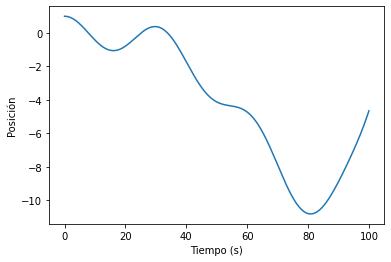

In [2]:
a = 0.2
b = 0.95e-8
c = -1e-6

def x(t):
    return np.cos(a*t) + b*t**5 + c*t**4

#invento un intervalo de tiempo
h = 0.1
t = np.arange(0,100,h)

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición')
plt.plot(t,x(t))

### Como convierto mis arreglos en un solo dataframe?

In [3]:
#Veamos que al imprimir nuestros arreglos, estos se encuentran en 'linea horizontal'
print('posicion')
print(x(t)[0:20])

posicion
[1.         0.99980001 0.99920011 0.99820053 0.99680168 0.9950041
 0.99280851 0.99021576 0.98722688 0.98384304 0.98006559 0.975896
 0.97133592 0.96638716 0.96105165 0.9553315  0.94922896 0.94274645
 0.93588651 0.92865184]


In [4]:
#Nosotros necesitamos pivotearlos para convertirlos en una tabla,  para tal fin, vamos a utilizar la función Transpose.
data = np.transpose([x(t),t])
print(data)

[[ 1.          0.        ]
 [ 0.99980001  0.1       ]
 [ 0.99920011  0.2       ]
 ...
 [-4.75977323 99.7       ]
 [-4.70434068 99.8       ]
 [-4.64839241 99.9       ]]


In [5]:
#y le damos nombres a las columnas de nuestro futuro dataframe dentro de una lista
columns = ['posicion','tiempo']
# para crear nuestro dataframe, al cual le pasaremos como parámetros  el arreglo transpuesto y el nombre de las columnas usamos la función DataFrame
df = pd.DataFrame(data, columns = columns)

print(df)

     posicion  tiempo
0    1.000000     0.0
1    0.999800     0.1
2    0.999200     0.2
3    0.998201     0.3
4    0.996802     0.4
..        ...     ...
995 -4.869133    99.5
996 -4.814700    99.6
997 -4.759773    99.7
998 -4.704341    99.8
999 -4.648392    99.9

[1000 rows x 2 columns]


Otra manera de hacer lo mismo

In [6]:
# y si se dan un poco de maña, podemos omitir todo lo anterior y hacer lo mismo rápidamente de la siguiente manera 
df_2 =  pd.DataFrame({
        'posicion': x(t) ,
        'tiempo': t
        })
print(df_2)


     posicion  tiempo
0    1.000000     0.0
1    0.999800     0.1
2    0.999200     0.2
3    0.998201     0.3
4    0.996802     0.4
..        ...     ...
995 -4.869133    99.5
996 -4.814700    99.6
997 -4.759773    99.7
998 -4.704341    99.8
999 -4.648392    99.9

[1000 rows x 2 columns]


In [19]:
#para ver aproximadamente como se distribuyen los valores numérivos dentro de un DataFrame (omite otros tipos de dato), podemos llamar a la función
df.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


Ahora bien... Cómo ploteo la info en un DataFrame?

In [7]:
# para traerme solo una columna del dataframe, basta con castear el nombre de la columna entre corchetes
print(df['posicion'])

0      1.000000
1      0.999800
2      0.999200
3      0.998201
4      0.996802
         ...   
995   -4.869133
996   -4.814700
997   -4.759773
998   -4.704341
999   -4.648392
Name: posicion, Length: 1000, dtype: float64


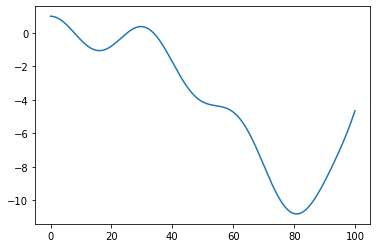

In [8]:
# para plotear el gráfico que obtuvimos inicialmente entonces:
plt.plot(df['tiempo'],df['posicion'])

Como obtengo los valores dado un índice?

In [9]:
#de manera similar a numpy, si quiero obtener el valor en un índice dado, por ejemplo, el valor de la posición para la 4ta fila:
df['posicion'][3]

0.9982005318582892

#### Pandas permite filtrar los datos, para hacer esto usaremos la funcion $loc$ </br> 

sintaxis:</br>
DataFrame.loc[ (condicion 1) ]</br>

operador AND: </br>
DataFrame.loc[  (condicion 1) &  (condicion 2) ]</br>

operador OR:</br>
DataFrame.loc[  (condicion 1) | (condicion 2) ]</br>

In [10]:
#Suponiendo que quiero otro dataframe que contenta solo los valores de posición positivos, dentro de los primeros 30 segundos
df_3 = df.loc[ (df['posicion'] > 0) & (df['tiempo'] < 30) ]
df_3

,posicion,tiempo
0,1.000000,0.0
1,0.999800,0.1
2,0.999200,0.2
3,0.998201,0.3
4,0.996802,0.4
...,...,...
295,0.382387,29.5
296,0.382979,29.6
297,0.383141,29.7
298,0.382870,29.8


Al mismo tiempo, permite guardar la info en distintos formatos, por simplicidad, usaremos csv y dejaremos el archivo en el directorio donde nuestro código se encuentra alojado

In [11]:
#la función recibe como parámetro el directorio a dejar el archivo, y si queremos o no que las filas conserven el indice, es decir, que se guarde en otra columna
nombre_archivo = './clase5_data_ejemplo.csv'
df.to_csv(nombre_archivo, index=False)

Para levantar un archivo el procedimiento es muy similar

In [12]:
df_4= pd.read_csv(nombre_archivo)
df_4.head()

,posicion,tiempo
0,1.000000,0.0
1,0.999800,0.1
2,0.999200,0.2
3,0.998201,0.3
4,0.996802,0.4


In [ ]:
#para borrar el archivo
import os
os.remove(nombre_archivo)

### Cómo guardo el resultado de una operación en una columna?
Para crear una nueva columna, basta con asignarle un nombre y a qué operación corresponde:

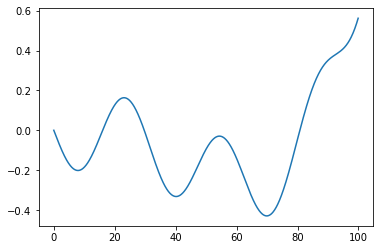

In [13]:
def derivada(t):
    return   ( x(t+h) - x(t-h) ) / (2*h)

df['velocidad'] = derivada( df['tiempo'] )

plt.plot(df['tiempo'],df['velocidad'])

### Finalmente, cómo agrupo la información?
Supongamos que nuestro dataframe está desagregado en varias columnas, por ejemplo año, país, temperatura promedio. Y nosotros queremos plotear la temperatura promedio por país.

In [36]:
#levantamos el set de datos
df_temperaturas = pd.read_csv('.\Recursos\TP_Pandas\serie_tiempo_temperaturas.csv')

In [37]:
#y le pegamos una miradita para ver de que se trata
df_temperaturas.head()

,Year,Country,City,AvgTemperature
0,1995,Argentina,Buenos Aires,61.701370
1,1995,Bahamas,Nassau,76.628493
2,1995,Barbados,Bridgetown,80.766849
3,1995,Belize,Belize City,-44.337190
4,1995,Bermuda,Hamilton,69.420548


In [67]:
#si quisiera por ejemplo ver los distintos valores que puede tomar un campo string
df_temperaturas.Country.unique()

array(['Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
       'Equador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Nicaragua',
       'Panama', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'], dtype=object)

A veces para ver gráficamente la información que tenemos en un dataframe, más que un gráfico de lineas nos sirve mas un diagrama de dispersión, también llamado scatter plot. 

c:\Users\Daiana\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


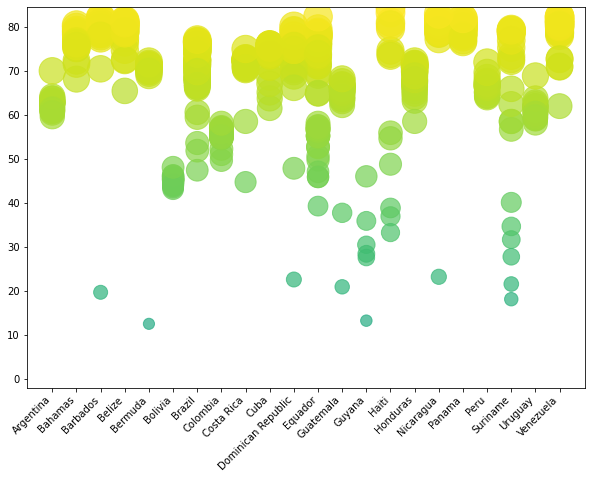

In [63]:
fig = plt.figure(figsize=(10, 7))# tamaño de la figura
plt.ylim(-2, max(df_temperaturas['AvgTemperature'])) # limite del eje y:  desde y hasta
plt.xticks(rotation=45, ha='right') # giro 45 grados las etiquetas del eje x para que no se me encimen

plt.scatter(df_temperaturas['Country'], #eje x
            df_temperaturas['AvgTemperature'], #eje y 
            s = df_temperaturas['AvgTemperature']*10, # s : size
            c =df_temperaturas['AvgTemperature'], # c : color
            alpha = 0.7 ) # alpha : opacidad del color

la sintaxis para agrupar por un campo un dataframe es:

df.groupby( ['NombreColumnaAgrupadora'] )[ 'Metrica' ].agrupador()

In [43]:
#por ejemplo, el promedio de las temperaturas por país
df_temp_agrup = df_temperaturas.groupby(['Country'])['AvgTemperature'].mean().reset_index(name='Temperature')
df_temp_agrup.head()

,Country,Temperature
0,Argentina,62.491706
1,Bahamas,76.549409
2,Barbados,77.023420
3,Belize,73.630746
4,Bermuda,67.034401


### Ahora si, La guía de Pandas! :)

## Consigna 1:
Crear un dataframe con la posición de un movil en determinado momento del tiempo, donde su ecuación horaria sea <br>
$ x(t) = 6t^{2} - 6t + \frac{10}{t}$<br>
Crear dos columnas: con el resultado obtenido de determinar la velocidad del móvil, y su aceleración <br>
Crear un gráfico con la velocidad en función del tiempo del movil.

## Consigna 2:
Levantar el archivo del classroom llamado serie_tiempo_temperatura.csv<br>
Hacer un paneo general del dataset para ver el nombre de las columnas y de qué se trata la información.<br>
Con el dataframe inicial, crear un scatter plot para ver a distribución de la temperatura en America del sur (pssss: crear otro dataframe temporal agrupando las columnas que necesite para ver esto y filtrar por el campo Country, viendo previamente qué valores únicos contiene.)<br>
Por otro lado, y con todo lo aprendido, plotear en el mismo gráfico la temperatura máxima y mínima alcanzada cada año.<br>
